### Data Analysis




#### Regression analyse with model $y=A+Bx$

We consider a regression model $v=v_0+at$
where $v_0$ is the initail velocity, $a$ the constant acceleration, $t$ the time, and $v$ the final velocity.

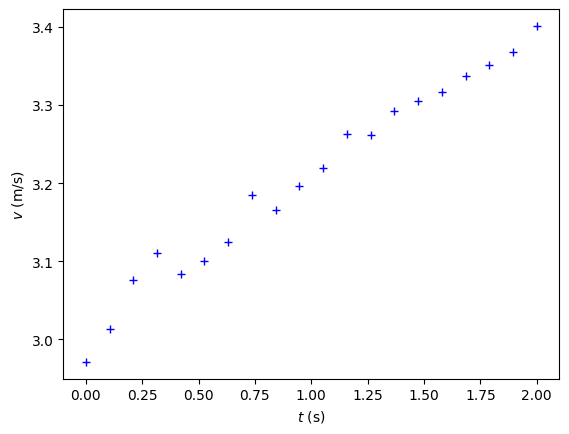

In [3]:
import numpy as np
rng = np.random.default_rng(5987495749)
t = np.linspace(0,2,20) # values for independent variable
a = 0.20 # slope, acceleration
v0 = 3.0 # intersection, initial velocity
v = v0 + a * t + 0.02*rng.normal(size=np.size(t)) # generate velocity values with added noise
import matplotlib.pyplot as plt
plt.figure()
plt.plot(t,v,'b+')
plt.xlabel('$t$ (s)')
plt.ylabel('$v$ (m/s)')
plt.show()

#### We compute the slope and intersection from formulas

In [4]:
from numpy import sum
x = t
y = v
N = np.size(t)
A = (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(N*sum(x**2)-sum(x)**2)
B = (N*sum(x*y)-sum(x)*sum(y))/(N*sum(x**2)-sum(x)**2)
print(A)
print(B)

3.01025173051449
0.19700327678258453


#### We perform a regression analysis with the *scipy* package

We import the *scipy* package or rather part called *optimize*.
```python
from scipy.optimize import curve_fit
```
We need to program our model as a function of the independent variable, here called $x$, and all of the parameters, here $A$ and $B$.
The model should return the value of the dependent variable.
```python
def f(x,A,B):
    return A+B*x
```
We use the method *curve_fit* that gets the model, the values of the independent variable, and the values of the depedent variables.
```python
param,cov = curve_fit(f,x,y)
```
The method returns an array (here called param) of the found parameter values ($A$ and $B$), and a matrix, here called cov.
The diagonal of the matrix contains the squares of the uncertainties in the parameters ($\delta A$ and $\delta B$).
We extract the uncertainties in an array with 
```python
np.sqrt(np.diag(cov))
```
The parameters are of the form $[A,B]$ and we can extract the parameters with $*param$ that gives $A,B$, which allow us
to insert the parameters in the model 
```python
f(x,*param)
```
This is used to plot the data and the regression function.

[3.01025173 0.19700328]
[0.00818197 0.00699436]
A = 3.010+/-0.008
B = 0.197+/-0.007


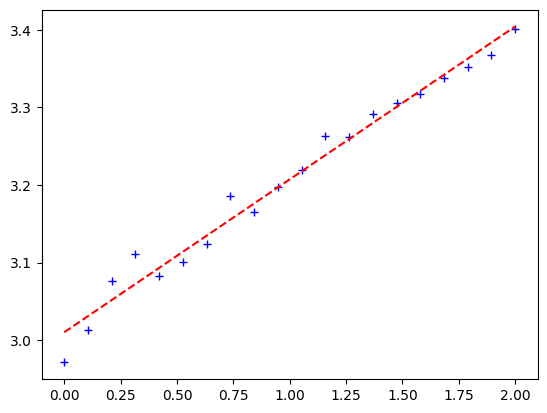

In [5]:
from scipy.optimize import curve_fit
def f(x,A,B):
    return A+B*x
param,cov = curve_fit(f,x,y)
print(param)
print(np.sqrt(np.diag(cov)))
import uncertainties as unc
A = unc.ufloat(param[0],np.sqrt(np.diag(cov))[0])
B = unc.ufloat(param[1],np.sqrt(np.diag(cov))[1])
print('A = {}'.format(A))
print('B = {}'.format(B))
x_values = np.linspace(t[0],t[-1],100)
plt.figure()
plt.plot(x,y,'b+')
plt.plot(x_values,f(x_values,*param),'r--')
plt.show()

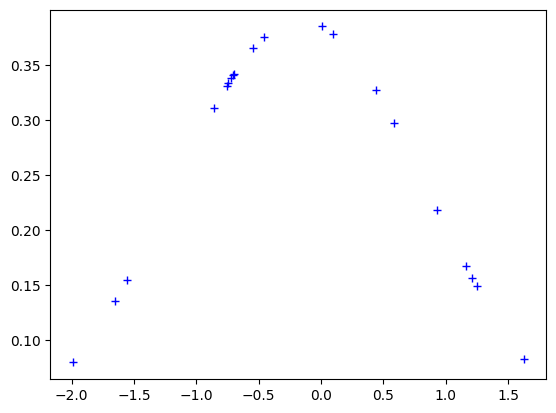

In [20]:
import pandas as pd
x = rng.normal(size=20)
mu = np.mean(x)
sd = np.std(x)
y = 1/(sd*np.sqrt(2*np.pi)) * np.exp((-(x-mu)**2)/(2*sd**2))
plt.plot(x,y,'b+')

#### Compute uncertainty in $y$-values and plot with error bars

We compute the uncertainty in the $y$-values as the standard deviation
$\delta v=\sqrt{\frac{\sum_i \left(v_i-(A+Bt_i)\right)^2}{N-2}}$
In Python this is done as
```python
dv = np.std(v-f(t,*param),ddof=2)
```
Note the ddof=2 which is due to the fact that we have determined two parameters, *A,B*.
We then plot the data with (identical) uncertainties.

Finally we plot the regression function and data points with error bars.
```python
plt.errorbar(x,y,yerr=dy,fmt='o',capsize=4)
```
dy is the value of the uncertainty.

dy = 0.018986073069941694


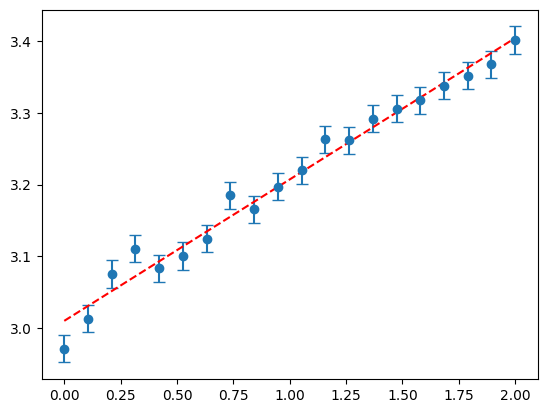

In [10]:
dy = np.std(y-f(x,*param),ddof=2)
print('dy = {}'.format(dy))
plt.figure()
plt.errorbar(x,y,yerr=dy,fmt='o',capsize=4)
plt.plot(x_values,f(x_values,*param),'r--')
plt.show()

#### Individual $y$-uncertainties

Let us now look at individual uncertainties in $y$.
We compute the individual uncertainties with
The command
```python
dy = 0.02 + 0.005 * rng.normal(size = np.size(t))
```
which creates an array of normally distributed random numbers the mean 0.02 and standard deviation 0.005.
The size of the array is the same as the length of the array *t*.

The errors are plotted with the command
```python
plt.errorbar(x,y,yerr=dy,fmt='o',capsize=4)
```
where dy is now an array of the individual uncertainties.

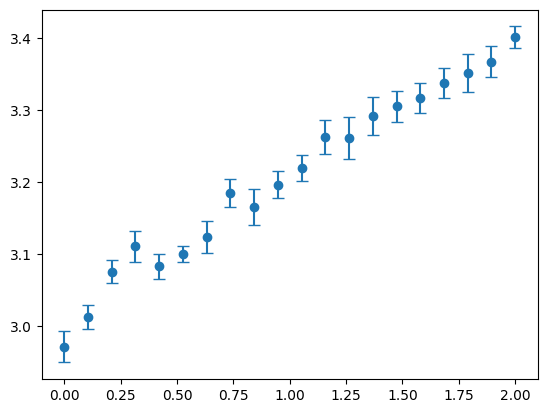

In [11]:
rng = np.random.default_rng(46286846238)
dy = 0.02 + 0.005 * rng.normal(size = np.size(t))
plt.figure()
plt.errorbar(x,y,yerr=dy,fmt='o',capsize=4)
plt.show()

#### Regression analysis of $y=A+Bx$ with $y$-uncertainties

We now perform the regression analysis but this time we
add information about the individual uncertainties with *sigma=dy*
and signal that they are absolute uncertainties with the flag *absolute_sigma=True*.
The *curve_fit* method returns the types.
```python
param,cov = curve_fit(f,x,y,sigma=dy,absolute_sigma=True)
```
The regression function and data with error bars are plotted.

[3.01696934 0.19320717]
[0.00804111 0.00729684]
A = 3.017+/-0.008
B = 0.193+/-0.007


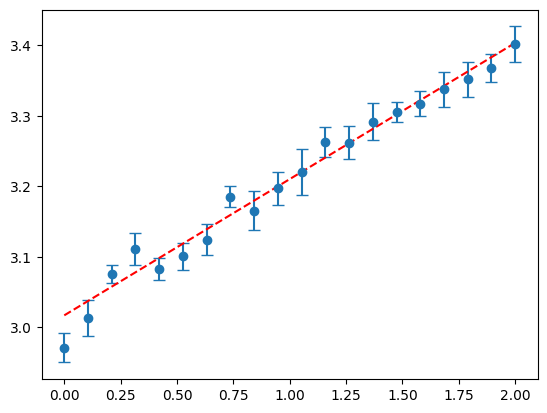

In [46]:
param,cov = curve_fit(f,x,y,sigma=dy,absolute_sigma=True)
print(param)
print(np.sqrt(np.diag(cov)))
import uncertainties as unc
A = unc.ufloat(param[0],np.sqrt(np.diag(cov))[0])
B = unc.ufloat(param[1],np.sqrt(np.diag(cov))[1])
print('A = {}'.format(A))
print('B = {}'.format(B))
plt.figure()
plt.errorbar(x,y,yerr=dy,fmt='o',capsize=4)
plt.plot(x_values,f(x_values,*param),'r--')
plt.show()

### Regression linear

#### Regression $y=A+Bx$ with $x$- and $y$-uncertainties

$y=A+Bx$

$\delta y =\left|B\right|\delta x$

$\delta y_\text{modified}=\sqrt{\delta y^2+B^2\delta x^2}$

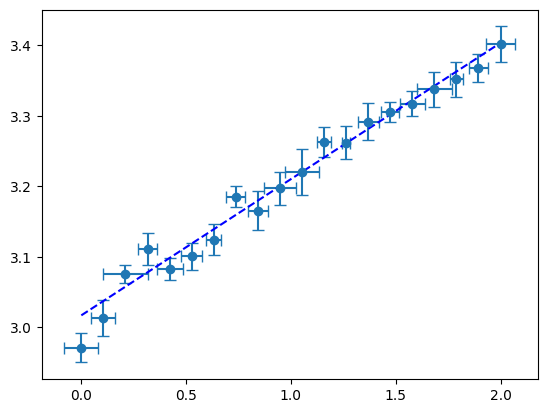

In [49]:
rng = np.random.default_rng(123747463)
dx = 0.05 + 0.02 * rng.normal(size = np.size(t))
plt.figure()
plt.errorbar(x,y,xerr=dx,yerr=dy,fmt='o',capsize=4)
plt.plot(x_values,f(x_values,*param),'b--')
plt.show()

```python
dv = np.sqrt(dv_original**2+B.n**2*dt**2)
```

In [51]:
param,cov = curve_fit(f,x,y)
A = unc.ufloat(param[0],np.sqrt(np.diag(cov))[0])
B = unc.ufloat(param[1],np.sqrt(np.diag(cov))[1])
print('A = {}, B = {} {:.8f} {:.8f}'.format(A,B,A.n,B.n))
dy_original = np.copy(dy)
for i in range(3):
    dy = np.sqrt(dy_original**2+B.n**2*dx**2)
    param,cov = curve_fit(f,x,y,sigma=dy,absolute_sigma=True)
    A = unc.ufloat(param[0],np.sqrt(np.diag(cov))[0])
    B = unc.ufloat(param[1],np.sqrt(np.diag(cov))[1])
    print('A = {}, B = {} {:.8f} {:.8f}'.format(A,B,A.n,B.n))

A = 3.010+/-0.008, B = 0.197+/-0.007 3.01025173 0.19700328
A = 3.014+/-0.010, B = 0.195+/-0.009 3.01380990 0.19529559
A = 3.014+/-0.010, B = 0.195+/-0.009 3.01381507 0.19529352
A = 3.014+/-0.010, B = 0.195+/-0.009 3.01381508 0.19529352


#### Regression - other functions

$y=A+Bx+Cx^2$

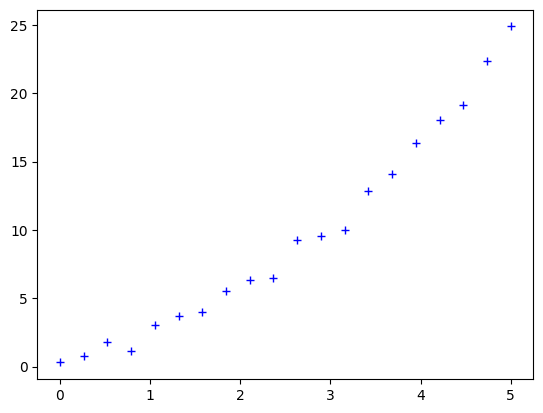

In [33]:
import numpy as np
t = np.linspace(0,5,20)
a = 1.50
v0 = 1.0
x0 = 0.5
x = x0 + v0 * t + 1/2 * a * t ** 2 + np.random.normal(loc=0.0,scale=0.5,size=np.size(t))
import matplotlib.pyplot as plt
plt.figure()
plt.plot(t,x,'b+')
plt.show()

[0.65296149 0.94918355 0.75368858]
[0.35976162 0.33350916 0.06438898]
A = 0.7+/-0.4
B = 0.95+/-0.33
C = 0.75+/-0.06


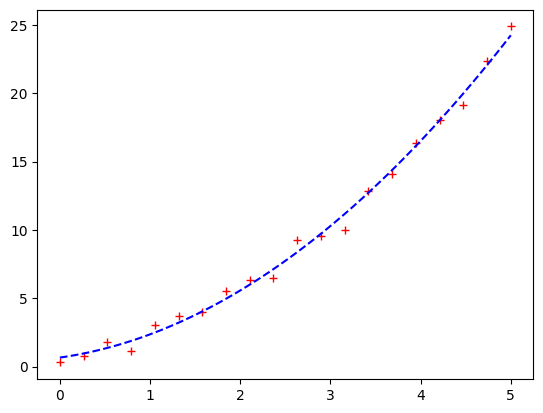

In [34]:
from scipy.optimize import curve_fit
def f(t,A,B,C):
    return A+B*t+C*t**2
param,cov = curve_fit(f,t,x)
print(param)
print(np.sqrt(np.diag(cov)))
import uncertainties as unc
A = unc.ufloat(param[0],np.sqrt(np.diag(cov))[0])
B = unc.ufloat(param[1],np.sqrt(np.diag(cov))[1])
C = unc.ufloat(param[2],np.sqrt(np.diag(cov))[2])
print('A = {}'.format(A))
print('B = {}'.format(B))
print('C = {}'.format(C))
t_values = np.linspace(t[0],t[-1],100)
plt.figure()
plt.plot(t,x,'r+')
plt.plot(t_values,f(t_values,*param),'b--')
plt.show()

#### Compute the uncertainty in the $y$-values

$\delta x=\sqrt{\frac{x_i-(A+Bt_i+Ct_i^2)}{N-3}}$
```python
dx = np.std(x-f(t,*param),ddof=3)
```
Note the ddof=3 which is due to the fact that we have determined three parameters, *A,B,C*.

dx = 0.5908226435676283


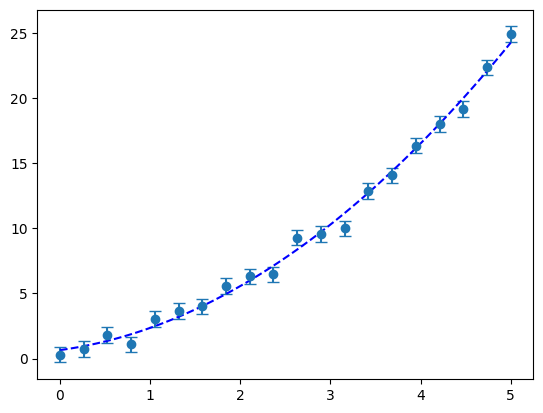

In [35]:
dx = np.std(x-f(t,*param),ddof=3)
print('dx = {}'.format(dx))
plt.figure()
plt.errorbar(t,x,yerr=t*0+dx,fmt='o',capsize=4)
plt.plot(t_values,f(t_values,*param),'b--')
plt.show()

#### Transformation of data

Taking logarithms on both sides of an exponential function
$y=A\text{e}^{Bx}$ leads to a linear function, $\ln y=\ln A +{Bx}$, in $(x,\ln y)$.

Taking logarithms on both sides of a power function
$y=Ax^{B}$ leads to a linear function, $\ln y=\ln +B \ln x$, in $(\ln x,\ln y)$.

A logarithmic function $y=A+B\ln(x)$ is already linear in $(\ln x,y)$.

A quadratic polynomial 
$y=A+Bx+Cx^2$
can be tranformed into a linear function if we plot 
$(x,\frac{y-y_0}{x-x_0})$
where $(x_0,y_0)$ is a data point.

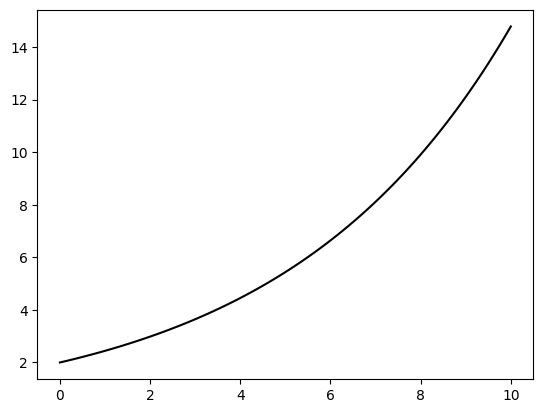

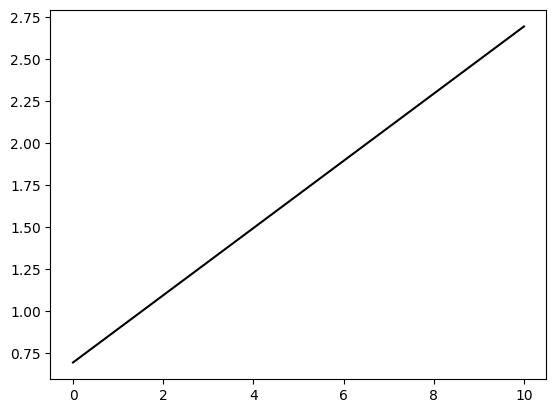

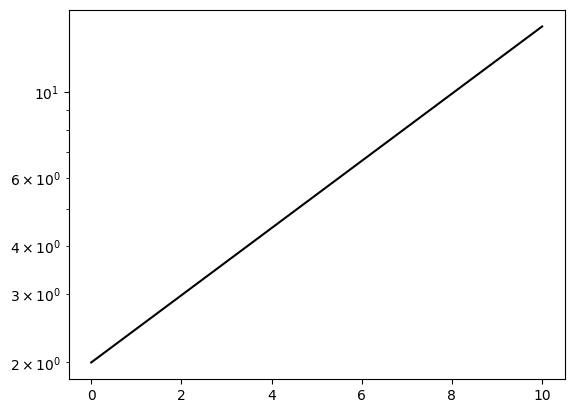

In [ ]:
import numpy as np
A = 2.0
B = 0.2
x = np.linspace(0,10,100)
y = A * np.exp( B * x )
plt.figure()
plt.plot(x,y,'k-')
plt.show()
plt.plot(x,np.log(y),'k-')
plt.show()
plt.semilogy(x,y,'k-')
plt.show()

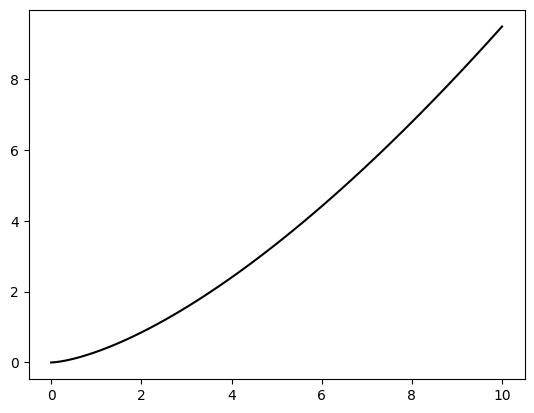

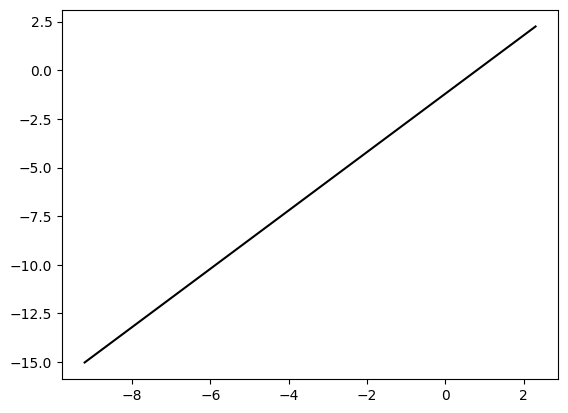

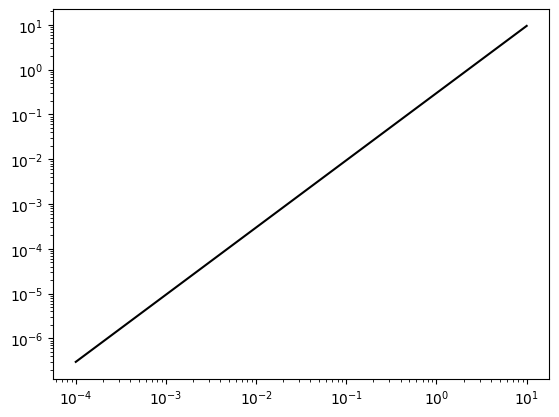

In [ ]:
import numpy as np
A = 0.3
B = 1.5
x = np.linspace(0.0001,10,100)
y = A * x ** B
plt.figure()
plt.plot(x,y,'k-')
plt.show()
plt.plot(np.log(x),np.log(y),'k-')
plt.show()
plt.loglog(x,y,'k-')
plt.show()

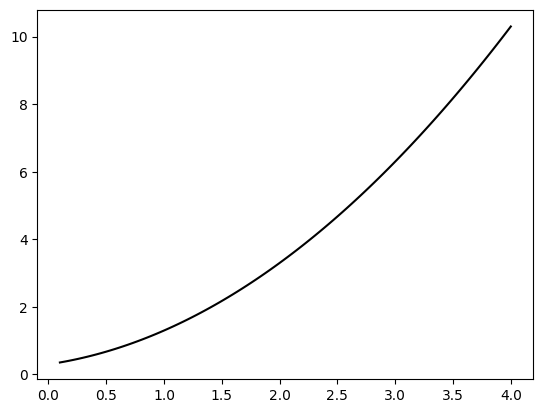

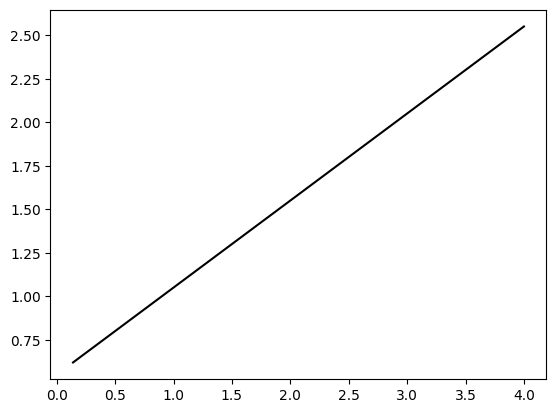

In [ ]:
import numpy as np
A = 0.3
B = 0.5
C = 0.5
x = np.linspace(0.1,4,100)
y = A + B * x + C * x ** 2
plt.figure()
plt.plot(x,y,'k-')
plt.show()
plt.plot(x[1:],(y[1:]-y[0])/(x[1:]-x[0]),'k-')
plt.show()

#### Importing data

In [ ]:
import numpy as np
import pandas as pd
velocity_df = pd.read_csv("data/20230802-125155_Wheel.csv")
display(velocity_df.head())

,index,frame,sample,time,raw[0],cal[0],raw[1],cal[1],raw[2],cal[2]
0,0,10,0,0.01,14,0.0270,14,1.33333,14,-0.666667
1,1,11,0,0.02,27,0.0335,13,1.32500,-1,-0.500000
2,2,12,0,0.03,40,0.0402,13,1.34000,0,-0.545455
3,3,13,0,0.04,53,0.0534,13,1.32000,0,-0.467532
4,4,14,0,0.05,67,0.0666,14,1.32000,1,-0.306493


In [ ]:
velocity_df = pd.read_csv("data/20230802-125155_Wheel.csv",usecols=[3,7])
display(velocity_df.head())

,time,cal[1]
0,0.01,1.33333
1,0.02,1.32500
2,0.03,1.34000
3,0.04,1.32000
4,0.05,1.32000


In [ ]:
t = velocity_df.iloc[:,0]
v = velocity_df.iloc[:,1]
print(t[0:5])
print(v[0:5])

0    0.01
1    0.02
2    0.03
3    0.04
4    0.05
Name:  time, dtype: float64
0    1.33333
1    1.32500
2    1.34000
3    1.32000
4    1.32000
Name:  cal[1], dtype: float64


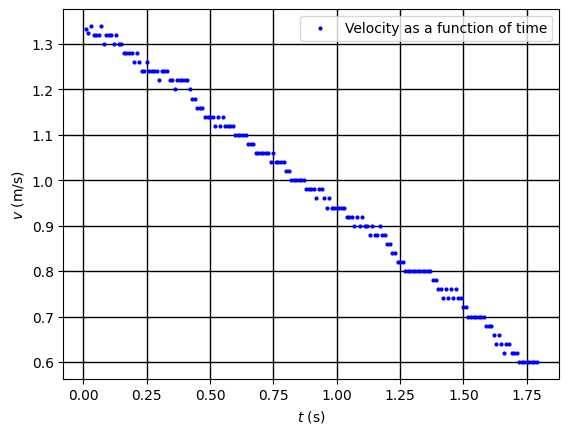

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(t,v,'bo',markersize=2,label='Velocity as a function of time')
plt.xlabel('$t$ (s)')
plt.ylabel('$v$ (m/s)')
plt.grid(color='k', linestyle='-', linewidth=1)
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import curve_fit
def f(t,v0,a):
    return v0+a*t
param,cov = curve_fit(f,t,v)
import uncertainties as unc
V0 = unc.ufloat(param[0],np.sqrt(np.diag(cov))[0])
A = unc.ufloat(param[1],np.sqrt(np.diag(cov))[1])
print('v0 = {}'.format(V0))
print('a = {}'.format(A))

v0 = 1.3618+/-0.0020
a = -0.4263+/-0.0019


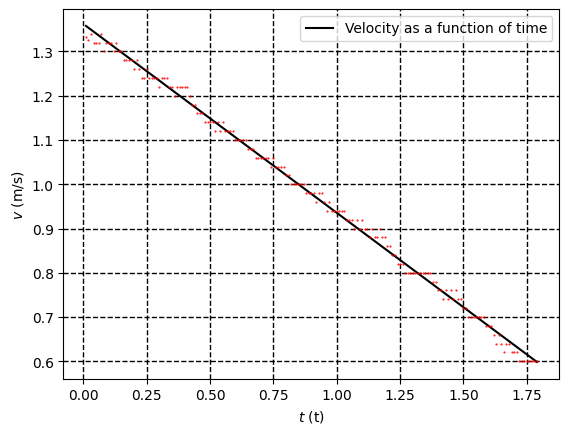

In [ ]:
z = f(t,*param)
plt.figure()
plt.plot(t,z,'-k',markersize=1,label='Velocity as a function of time')
plt.plot(t,v,'.r',markersize=1)
plt.xlabel('$t$ (t)')
plt.ylabel('$v$ (m/s)')
plt.grid(color='k', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
dv = np.std(v-f(t,*param),ddof=2)
print('dv = {}'.format(dv)) 

dv = 0.013146473502295574


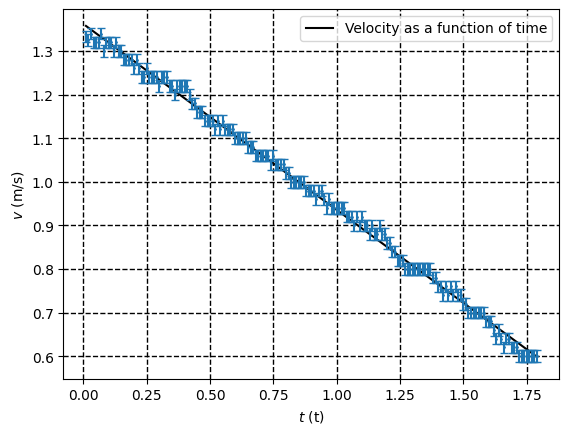

In [ ]:
plt.figure()
plt.plot(t,z,'-k',markersize=1,label='Velocity as a function of time')
plt.errorbar(x=t,y=v,yerr=dv,capsize=3,fmt='o',markersize=1)
plt.xlabel('$t$ (t)')
plt.ylabel('$v$ (m/s)')
plt.grid(color='k', linestyle='--', linewidth=1)
plt.legend()
plt.show()